# Data Mining Classification

Andrew Esch, Evan Lee, Collin Stratton

Dr. Isac Artzi

CST-425

2/6/2022

# Introduction

The purpose of this project is to apply data mining algorithms to perform classification then provide a clear analysis of the data. This project uses the kNN algorithm and SVM model to classify information about adults.

# Part 1
Classification is about determining a class/category from a given set of data. Ex. Is a person male or female given xyz data. Prediction uses the data to make predictions on an unknown set of data. Ex. How far can someone run given their health data/statistics. Classification is great at quick results and methods like SVM and Naive Bayes are not biased by outliers. A downside of classification is it has a difficult time with very small or very large datasets. If the dataset is too small there won't be correct results, while if the data set is too big, it will take a very long time to compute results. For KNN a weakness is having to choose the number of neighbors k. A way to find the best k value can be done through the elbow method but it adds a lot of calculation time. Prediction analysis can be a very strong way of predicting data but its drawback is its need for a dataset with lots of relevant and good data to base it off of. Not to mention it can be very expensive to obtain and manage to figure out a predictive model.

# Part 2: Implementation Process
Note: This will take at least 5 minutes to process for KFolding and error analysis.

# KNN Project

In [138]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

## Import data from Adult Data csvfile

In [139]:
# The column names are not included in the .data file so we must create an array of the column names and add them
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k-Prediction']

# Create a panda dataframe from adult.data and add column names
df = pd.read_csv("adult.data", names=colnames)

# Print out the top 20 instances from the dataframe
print(df.head(20))

    age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

## Data Preprocessing
Remove duplicate entries in the dataframe and use the .fit_transform() method to fit label

In [140]:
# remove duplicate data rows
df.drop_duplicates()

# label encoder is used to take all of our string data and assign it a unique integer value
le = LabelEncoder()

# use .fit_transform function to fit label
# encoder and return encoded label
# example, male/female will be turned into 0 and 1 for knn to calculate distance from
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['50k-Prediction'] = le.fit_transform(df['50k-Prediction'])  # under 50k = 0, over 50k = 1

# print out the top 20 instances from the dataframe to show how LabelEncoder changed our data
print(df.head(20))

    age  workclass  fnlwgt  education  education-num  marital-status  \
0    39          7   77516          9             13               4   
1    50          6   83311          9             13               2   
2    38          4  215646         11              9               0   
3    53          4  234721          1              7               2   
4    28          4  338409          9             13               2   
5    37          4  284582         12             14               2   
6    49          4  160187          6              5               3   
7    52          6  209642         11              9               2   
8    31          4   45781         12             14               4   
9    42          4  159449          9             13               2   
10   37          4  280464         15             10               2   
11   30          7  141297          9             13               2   
12   23          4  122272          9             13            

## Normalize the Data

In [141]:
x = df.drop('50k-Prediction', axis=1)   # all columns except 50k Prediction column (or classifier)
x10000 = x.iloc[:10000,].values         # Set sample amount to first 10000 rows

y = df['50k-Prediction']                # only the 50k Prediction column (or classifier),
y10000 = y.iloc[:10000,].values         # Set sample amount to first 10000 rows

# need to normalize our data so 0/1 values are weighted the same as 0-50 values
# don't need to normalize our y data because it is only 0s and 1s.
print(type(x))
x = preprocessing.scale(x)
print(type(x))
x = pd.DataFrame(x)
print(type(x))
x10000 = preprocessing.scale(x10000)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


## Training
Because KNN is a supervised classifier, split dataset into training set and test set. The X_train and y_train variables will be the 70% of the data, while X_test and y_test will be the 30%. X_train and y_train will create the model, then X_test will be plugged into the model which will produce the prediction for y_test values. Then we will compare the y_prediction values to the y_test values to determine the accuracy. We use x10000 and y10000 because these variables will be used 30 times to calculate the optimal neighbor value, hence we need a smaller training set, so it can run efficiently.

### Data Split and Finding Error

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x10000, y10000, test_size=0.3,random_state=1234)  # 70% training and 30% test


# determine the optimal amount of clusters using an error graph
# the biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction
Error = []  # arr to keep track of error percentage for each n value
for n in range(1,31):                               # calculate 30 different error values
    knnData = KNeighborsClassifier(n_neighbors=n)   # Uses KNeighborsClassifier to
    knnData = knnData.fit(X_train,y_train)          # Use train data to create a model
    y_pred = knnData.predict(X_test)                # Predict the y values with x_test values
    Error.append(1-accuracy_score(y_test,y_pred))   # Compare the y_pred values to the y_test actual values to find Error

### Plot Error

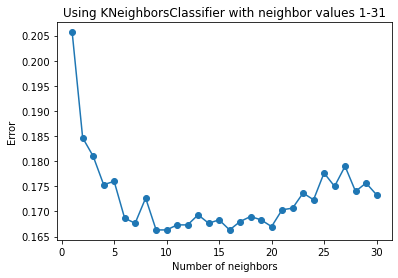

In [143]:
plt.plot(range(1, 31), Error, marker='o')  # Plot the 30 different error calculations
plt.title("Using KNeighborsClassifier with neighbor values 1-31")
plt.xlabel("Number of neighbors")
plt.ylabel("Error")
plt.show()

In [144]:
# print the index/n_neighbor value where the error is the lowest
best_n = Error.index(min(Error))+1
print(f"Lowest Error is with n neighbor value: {best_n}")

Lowest Error is with n neighbor value: 9


## Main KNN Calculations
### Show x and y are full datasets

In [145]:
# should be ~32k instances
print(f"Length of x data = {len(x)}")
print(f"Length of y data = {len(y)}")

Length of x data = 32561
Length of y data = 32561


### Use KFolding to Estimate Optimal K

In [146]:
k = 5  # Do 5 folds, and split the set into 80/20
kfold = KFold(n_splits=k, random_state=1234, shuffle=True)
knnclassifier = KNeighborsClassifier(n_neighbors=best_n)    # Note the use of best_n

acc_score = []

# for loop that calculates the KNeighbors Classifier 5 times using 5 different folds of the training and testing data, then average the results.
for train_index, test_index in kfold.split(x):
     x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
     y_train, y_test = y[train_index], y[test_index]

     knnclassifier.fit(x_train,y_train)
     y_pred = knnclassifier.predict(x_test)

     acc = accuracy_score(y_pred, y_test)
     acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8274220789190849, 0.8329238329238329, 0.8361486486486487, 0.8381449631449631, 0.8356879606879607]
Avg accuracy : 0.8340654968648981


### Create a Confusion Matrix

In [147]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# Results from confusion matrix:





print("4553 true positives")
print("889 true negatives")
print("432 false negatives")
print("638 false positives")

[[4553  432]
 [ 638  889]]
4553 true positives
889 true negatives
432 false negatives
638 false positives


## Results
### Precision
_How correct was the prediction?_

88% salary under 50k
67% salary over 50k
Averaging the two, the chance to identify is 78%, with a weighted 83% chance

### Recall
_A measure of the models' completeness. How many positive cases were found?_

91% of cases were found if salary is less than 50k
58% of cases were found if salary is over 50k
75% average cases found with a weighted 84% rate

### F1 Score
_What percent of positive predictions were correct?_

89% for salary <50k
62% for salary > 50k
Accuracy of 84% to determine if a person has a salary over/under 50k

In [148]:
print(classification_report(y_test,y_pred))
print(f"There are {confusion[1,0]} classification errors.")

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4985
           1       0.67      0.58      0.62      1527

    accuracy                           0.84      6512
   macro avg       0.78      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512

There are 638 classification errors.


## KNN Conclusion
By implementing all of these checks on our data like KFolding, Elbow Graph for minimum error rate, and data normalization, we can produce the best results with the data we have.  Although it does add some better accuracy, it comes at the cost of heavy computation time with bigger data sets. Our final results for KNN were in the range of 80-85% which is quite good.  The KNN method would be most useful for small to medium data with all integer values as transferring string categorical data to numerical could have provided some extra error in our model.

# SVM Project
The setup for this project follows the same steps as the KNN project initially.

## Normalize the Data
### Subset the data into x and y and set the sample amount

In [149]:
n = 10000           # Number of data points to include in the set (x and y vectors)
x = df.iloc[:n,:-1] # all columns except 50k Prediction column (or classifier)
y = df.iloc[:n,-1]  # only the 50k Prediction column (or classifier)

# Data Normalization
x = preprocessing.scale(x)
x = pd.DataFrame(x)

### Data Split and Finding Error
Determine the optimal gamma value using the elbow method to create an error graph. The biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction.

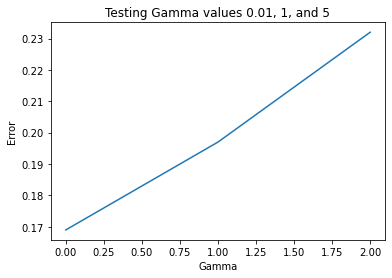

In [150]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1234)  # 70% training and 30% test

gammaError = []             # will keep track of Error percentage for each n value
gammaValues = [0.01, 1, 5]
for g in range(3):          # calculate 3 different error values
    svcData = SVC(kernel='rbf', gamma=gammaValues[g])   # use SVC to model the data with gamma
    svcData = svcData.fit(X_train,y_train)              # use training data to create a model
    y_pred = svcData.predict(X_test)                    # predict the y values with x_test values
    gammaError.append(1-accuracy_score(y_test,y_pred))  # compare the y_pred values to the y_test actual values to find Error

plt.plot(range(3),gammaError) # plot the 3 different error calculations
plt.title("Testing Gamma values 0.01, 1, and 5")
plt.xlabel("Gamma")
plt.ylabel("Error")
plt.show()

In [151]:
# will print the index value where the error is the lowest. Each time the data is randomly selected, so it will change each time it is run
best_g = gammaValues[gammaError.index(min(gammaError))]
print(f"Lowest Error for gamma is the index: {best_g}")

Lowest Error for gamma is the index: 0.01


Determine the optimal cpenalty value using the elbow method to create an error graph. The biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction

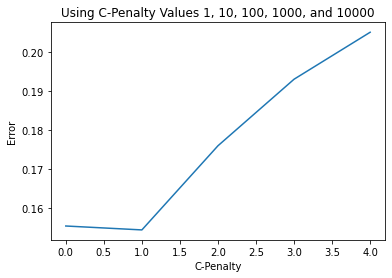

In [152]:
cpenaltyError = []  # keeps track of Error percentage for each n value
cpenaltyValues = [1, 10, 100, 1000, 10000]
for c in range(5):  # calculate 5 different error values
    cpenalty = cpenaltyValues[c]
    svcData = SVC(kernel='rbf', C=cpenalty)                 # use SVC to model the data with cpenalty
    svcData = svcData.fit(X_train,y_train)                  # use training data to create a model
    y_pred = svcData.predict(X_test)                        # predict the y values with x_test values
    cpenaltyError.append(1-accuracy_score(y_test,y_pred))   # compare the y_pred values to the y_test actual values to find Error

plt.plot(range(5),cpenaltyError) # plot the 3 different error calculations
plt.title("Using C-Penalty Values 1, 10, 100, 1000, and 10000")
plt.xlabel("C-Penalty")
plt.ylabel("Error")
plt.show()

### Print the index value where the error is the lowest

In [153]:
best_c = cpenaltyValues[cpenaltyError.index(min(cpenaltyError))]
print(f"Lowest Error for C-Penalty is the index: {best_c}")

Lowest Error for C-Penalty is the index: 10


## SVM Calculations
Build KFold Model to split and build model using the best c-penalty and gamma values

In [154]:
k = 5 # do 5 folds and split the set into 80/20
kfold = KFold(n_splits=k, random_state=1234, shuffle=True) # use KFolding using seed, shuffle, and k splits

# create a Gaussian SVC model with the best gamma and cpenalty value
svclassifier = SVC(kernel='rbf', gamma=best_g, C = best_c) # note the use of 'rbf'

acc_score = []

# use a loop to start the k folding method
for train_index, test_index in kfold.split(x):
     x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
     y_train, y_test = y[train_index], y[test_index]

     svclassifier.fit(x_train,y_train)
     y_pred = svclassifier.predict(x_test)

     acc = accuracy_score(y_pred, y_test)
     acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.845, 0.8475, 0.835, 0.829, 0.8535]
Avg accuracy : 0.842


## Create a Confusion Matrix

In [155]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1477   60]
 [ 233  230]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1537
           1       0.79      0.50      0.61       463

    accuracy                           0.85      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.85      0.85      0.84      2000



### Visualize the Results

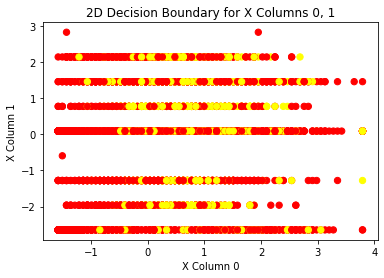

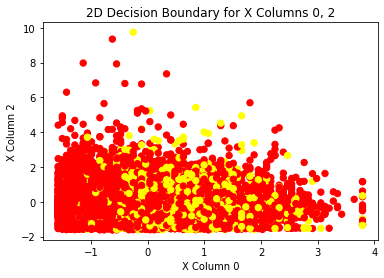

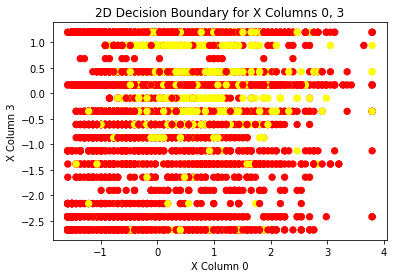

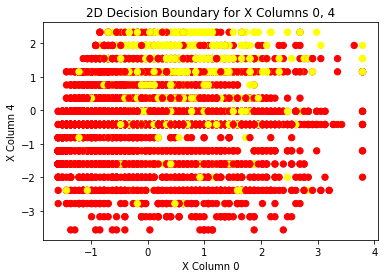

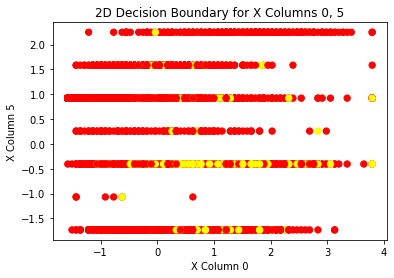

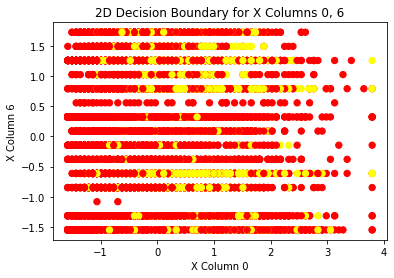

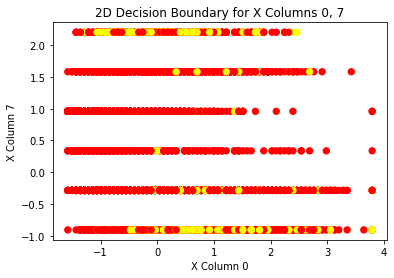

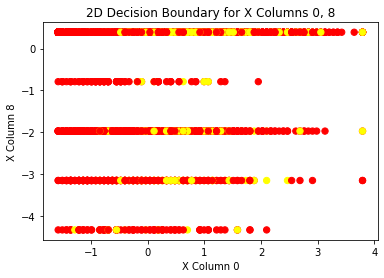

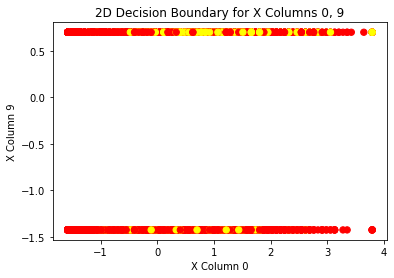

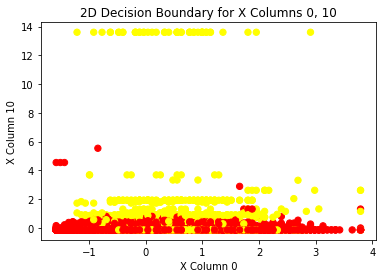

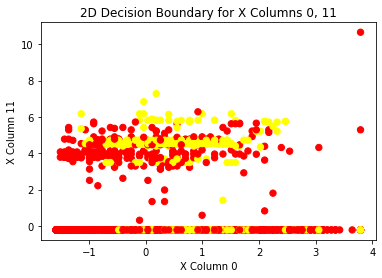

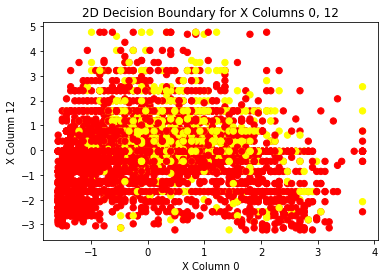

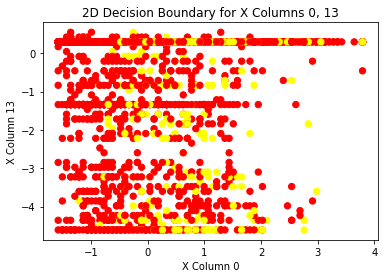

In [156]:
# To visualize every decision boundary with 14 variables, plot an example of each dimension, comparing the decision boundary for column 1 to every other column
import numpy as np
x = np.array(x)
y = np.array(y)

for i in range(1,14):
     plt.scatter(x[:, 0], x[:, i], c=y, s=40, cmap='autumn') # Create a scatter plot for column 0 and column i
     plt.xlabel('X Column ' + str(0)) # X label for column 0
     plt.ylabel('X Column ' + str(i)) # Y label for column i
     plt.title("2D Decision Boundary for X Columns " + str(0) + ", " + str(i))
     plt.show()

## Use of the ROC Curve and Meaning of Area under ROC Curve Explanation
The Receiver Operator Characteristic (ROC) curve is a tool to represent a classifier's predictive performance. It shows the tradeoff between sensitivity and specificity for any given classifier. It is calculated by plotting the rate of true positives vs. the false positives. To calculate these rates and create an ROC curve, simply plot a classifier's sensitivity (which represents true positives) against the calculation (1-specificity) between 0 and 1 (over a linear space). This will return an upwards curve that goes along the graph's diagonal. Typically, the closer the ROC curve is towards the top-left corner of the graph, the better a classifier's predictive performance.

The area under the curve (AUC) is another statistical indicator of predictive performance other classifiers. It indicates the probability that a true positive Label is ranked higher than a negative Label. A classifier with a higher AUC than other classifiers may have a higher predictive performance than other classifiers with a lower AUC, but may differ by case.


## SVM Conclusion and Comparison with KNN
By implementing data cleaning (e.g., getting rid of duplicate data), data normalization and several performance checks such as KFolding, the elbow method (for the two variables gamma and C-Penalty), this SVM model can produce the best accuracy possible for the Adult dataset. The final accuracy of the model falls between the range of 78%-85% (depending on the generated seed for KFolding). Error in this model could have occurred due to converting categorical data to numerical data. Overall, the SVM method is most useful for large sets of data with complex patterns.

Reviewing the visualization from all 14 dimensions of the data, it is clear that the model can generate accurate hyperplanes with complex boundary lines (using RBF Kernel). This allows the SVM method (with the RBF kernel) to accurately predict Labels no matter what pattern determines category classification.

Comparing with KNN model, the accuracy, precision, recall, and f1-score appear to have similar metrics with different individual scores. With a weighted precision average of 83% (KNN) and 85% (SVM), the model share a similar precision rate. However, the difference between detecting true positives and true negatives shares about a 5-15% difference. The same pattern also holds true for recall (where averages are 84% KNN and 85% SVM, but have a 10% difference in individual metrics) and f1-score (where averages are 83% KNN and 84% SVM, but have a 5% difference in individual metrics). This shows the difference in how KNN and SVM classify testing data points. While KNN takes the proximity of its nearest k neighbors into account, SVM uses a mathematical function (or pattern) to draw hyperplanes and separate classified data points. Thus, while the two models are similar, the metrics show that the two classifiers came to a similar conclusion with different individual metrics.

# References
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/
https://www.geeksforgeeks.org/advantages-and-disadvantages-of-different-classification-models/
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
https://muthu.co/understanding-the-classification-report-in-sklearn/
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://revolveai.com/predictive-analytics-advantages-and-disadvantages/